In [71]:
import pandas as pd

In [72]:
covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [73]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [74]:
#Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. 
# Тем самым переходим от данных по регионам к данным по странам:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
display(covid_data.head())

,date,country,confirmed,deaths,recovered
0,01/01/2021,Afghanistan,51526.0,2191.0,41727.0
1,01/01/2021,Albania,58316.0,1181.0,33634.0
2,01/01/2021,Algeria,99897.0,2762.0,67395.0
3,01/01/2021,Andorra,8117.0,84.0,7463.0
4,01/01/2021,Angola,17568.0,405.0,11146.0


In [75]:
#Преобразуем даты в формат datetime с помощью функции pd.to_datetime():
covid_data['date'] = pd.to_datetime(covid_data['date'])
display(covid_data.head())

,date,country,confirmed,deaths,recovered
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0
4,2021-01-01,Angola,17568.0,405.0,11146.0


In [76]:
#Создадим признак больных на данный момент (active). 
# Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
display(covid_data.head())

,date,country,confirmed,deaths,recovered,active
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0,7608.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0,23501.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0,29740.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0,570.0
4,2021-01-01,Angola,17568.0,405.0,11146.0,6017.0


In [77]:
#Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. 
# После этого произведём группировку по странам
# и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
display(covid_data.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [78]:
#В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [79]:
covid_data['date'].min()

Timestamp('2020-01-22 00:00:00')

In [80]:
covid_data['date'].max()

Timestamp('2021-05-29 00:00:00')

In [81]:
display(vaccinations_data['date'].min())
display(vaccinations_data['date'].max())

Timestamp('2020-12-02 00:00:00')

Timestamp('2022-03-29 00:00:00')

In [82]:
covid_df = covid_data.merge(vaccinations_data, on=['date', 'country'], how='left' )
display(covid_df['date'].min())
display(covid_df['date'].max())
display(covid_df.shape)
display(covid_df.head())

Timestamp('2020-01-22 00:00:00')

Timestamp('2021-05-29 00:00:00')

(86785, 16)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
covid_df['death_rate'] = covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate'] = covid_df['recovered']/covid_df['confirmed']*100
display(covid_df.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [84]:
covid_df[covid_df['country'] == 'United States']['death_rate'].max()

7.18954248366013

In [85]:
covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean()

67.06273489477655

### Графические возможности библиотеки Pandas

In [86]:
#Основные параметры метода plot()
#x — название признака, который будет отложен по оси абсцисс;
#y — название признака, который будет отложен по оси ординат;
#figsize — размер графика (кортеж из ширины и высоты в дюймах);
#kind —тип визуализации. Основные типы:
#'line' — линейный график (по умолчанию);
#'bar' — столбчатая диаграмма;
#'barh' — горизонтальная столбчатая диаграмма;
#'hist' — гистограмма;
#'box' — коробчатая диаграмма (boxplot);
#'pie' — круговая диаграмма;
#'scatter' — диаграмма рассеяния.

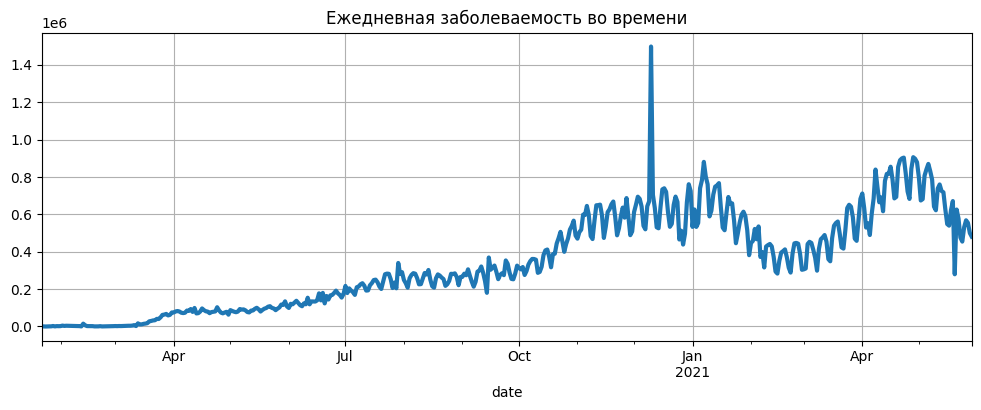

In [87]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени', #заголовок
    grid = True,  # наличие сетки
    lw=3 #толщина линии
); # символ ; служит для того, чтобы убрать служебную информацию

In [88]:
#Примечание. Обратите внимание, что мы не использовали параметры x и y. 
# Это связано с тем, что в нашем случае переменная grouped_cases — это объект Series.

#plot() может являться методом объекта типа DataFrame или Series. При типе DataFrame требуется указать х и у, 
# либо будут построены графики всех столбцов. При типе Series в этом нет необходимости, ведь это и так 
# всего один столбец данных (у) с индексами (х).

#При этом по оси абсцисс (х) откладываются индексы (на сгруппированных данных grouped_cases индексы — это даты), 
# а по оси ординат (у) — значения показателей.

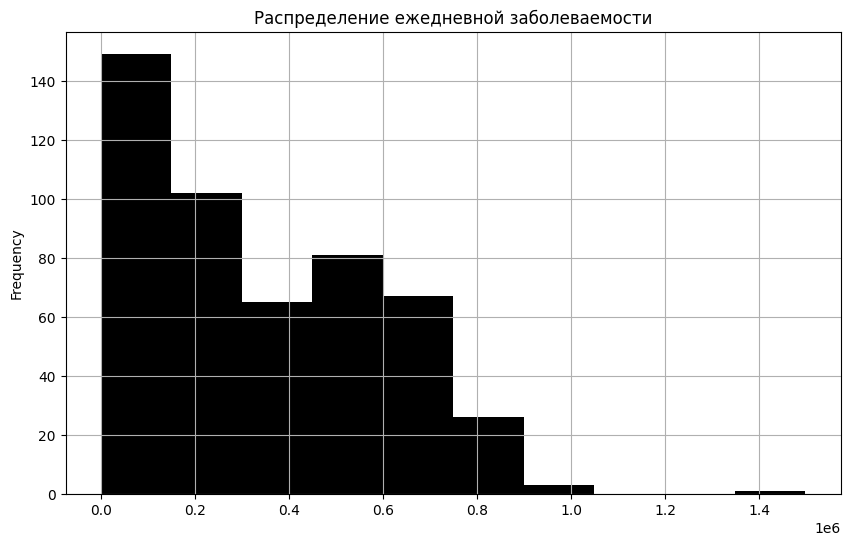

In [89]:
grouped_cases.plot(
    kind='hist', #гистограмма
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True, # сетка
    color = 'black', # цвет
    bins=10 #число делений
);

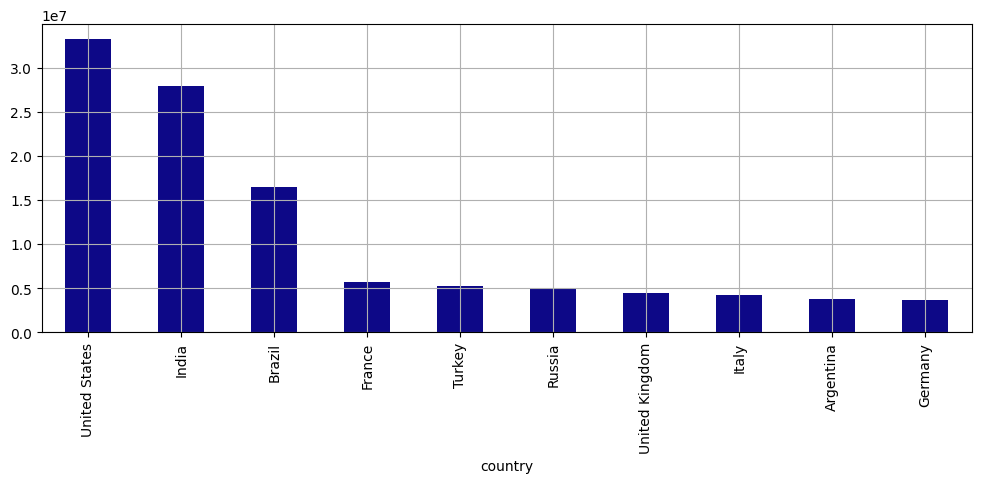

In [90]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last() #последнее значение в столбце
grouped_country = grouped_country.nlargest(10) # 10 крупнейших
grouped_country.plot(
    kind='bar', #столбчатая диарамма
    grid=True,
    figsize=(12, 4),
    colormap='plasma' # цветовая гамма графика
);

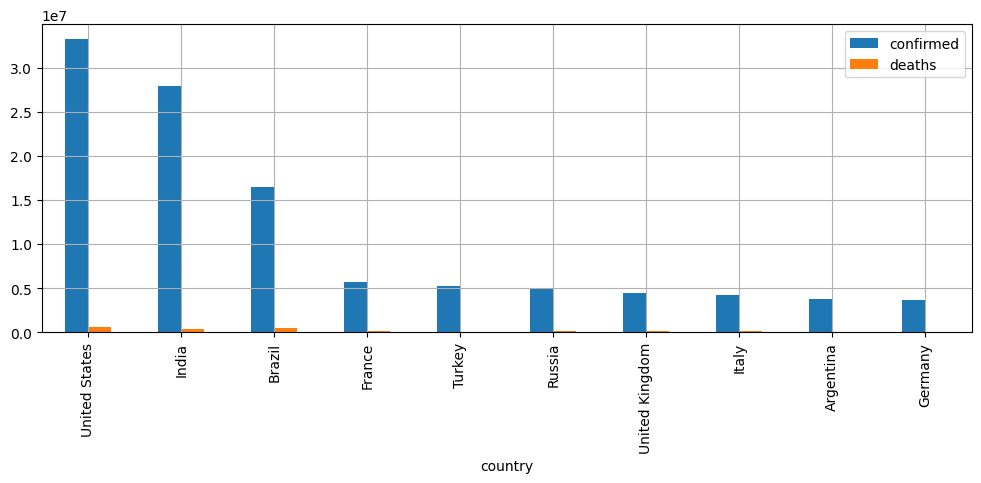

In [91]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last() # выбираем 2 показателя - подтвержденные и смерти, группируем опять по стране
grouped_country = grouped_country.nlargest(10, columns=['confirmed']) #это значит, что мы самые большие по числу заболеваний 10 стран выбираем
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

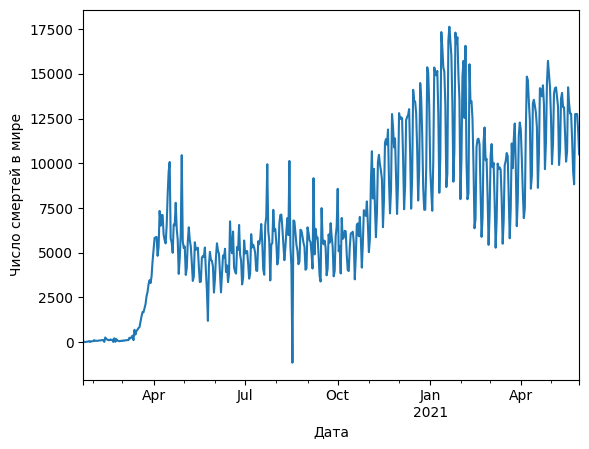

In [92]:
grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line',xlabel='Дата', ylabel='Число смертей в мире');

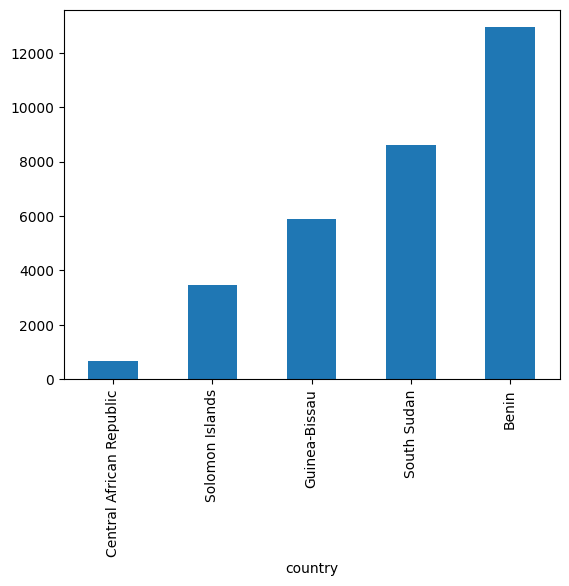

In [93]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

#### MATPLOTLIB

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline 
# так графики более корректно отображаются на ip
plt.style.use('default') #для лучшего отображения на темном фоне

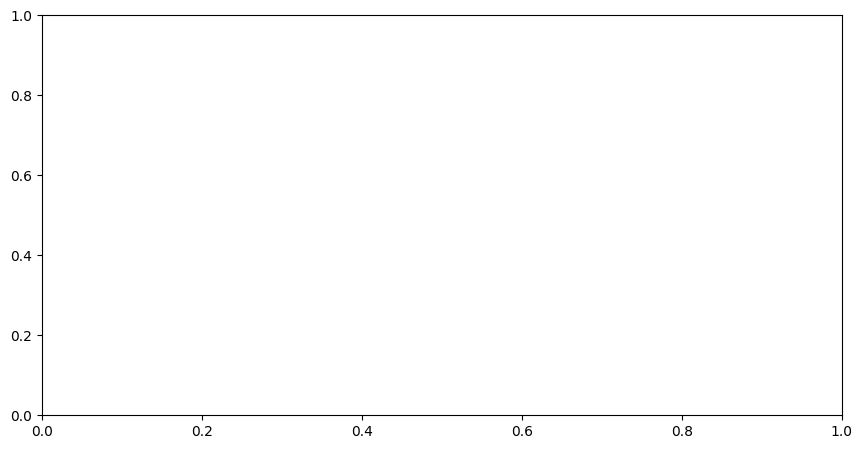

In [95]:
fig = plt.figure(figsize=(8,4)) #по сути мы задаем холст. размеры в дюймах
ax = fig.add_axes([0,0,1,1]) #создаем координаты на холсте. параметры это отступы снизу, отступ сверху и проценты заполнения фигуры координатными осями


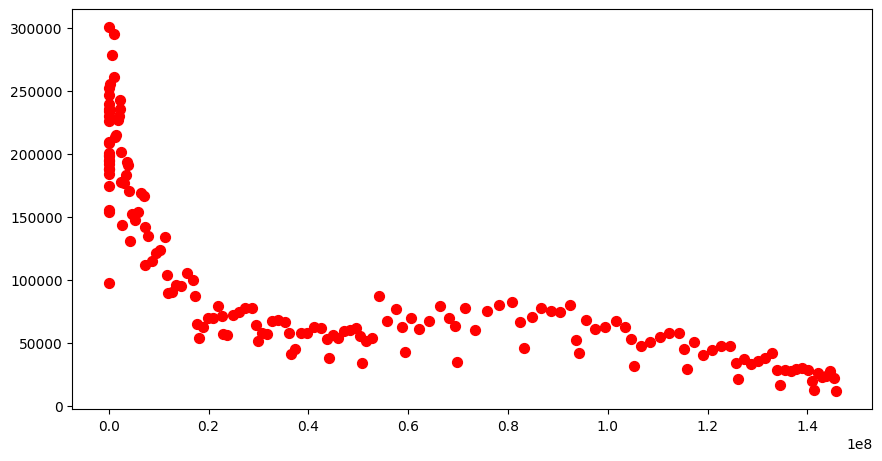

In [96]:
# построим график зависимости общего числа случаев заболевания от числа вакцинорованных 2м компонентом
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([0,0,1,1])
axes.scatter( # метод scatter - это диаграмма рассеяния
    x=us_data['people_fully_vaccinated'],
    y=us_data['daily_confirmed'],
    s=50, # размер точек
    marker='o', #форма точки. Еще можно '^'
    c='red'
);

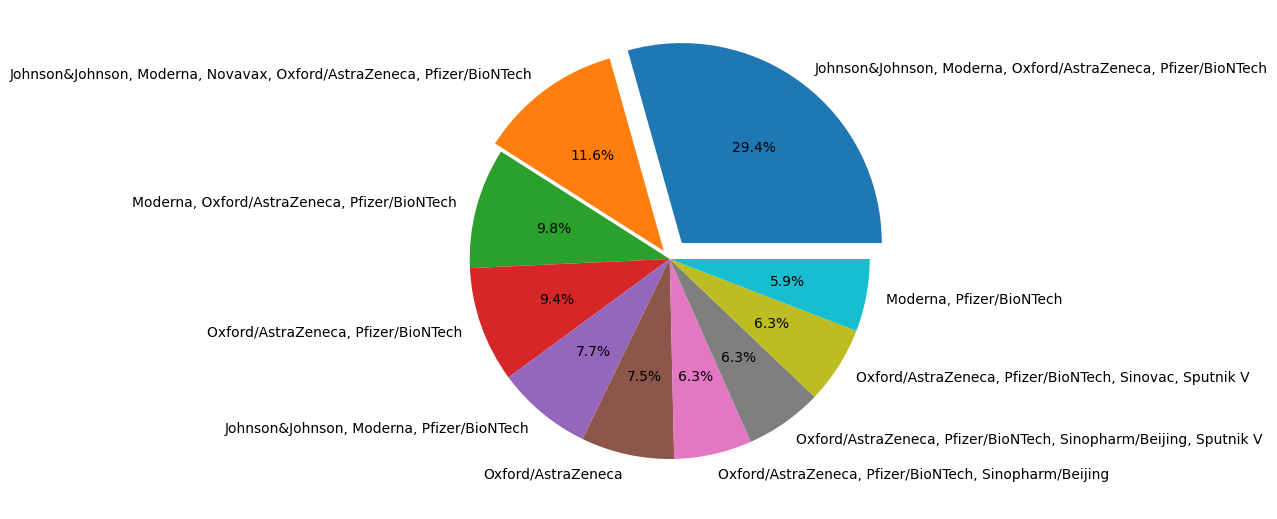

In [97]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10] # выбираем 10 наиболее популярных вакцин
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    vaccine_combinations, #значения
    labels= vaccine_combinations.index, #подписи
    autopct='%.1f%%', #формат выведения процента
    explode=[0.1,0.05,0,0,0,0,0,0,0,0] #это отступы кусочков
    );


In [98]:
# методы установки подписей осей координат
#axes.set_title() — заголовок диаграммы, а также его настройки (например, параметр fontsize отвечает за размер шрифта);
#axes.set_xlabel() — название оси абсцисс;
#axes.set_ylabel() — название оси ординат;
#axes.set_xticks() — установка отметок на оси абсцисс;
#axes.set_yticks() — установка отметок на оси ординат;
#axes.xaxis.set_tick_params() — управление параметрами отметок на оси абсцисс (например, параметр rotation отвечает за поворот отметок в градусах);
#axes.yaxis.set_tick_params() — управление параметрами отметок на оси ординат;
#axes.legend() — отображение легенды;
#axes.grid() — установка сетки.

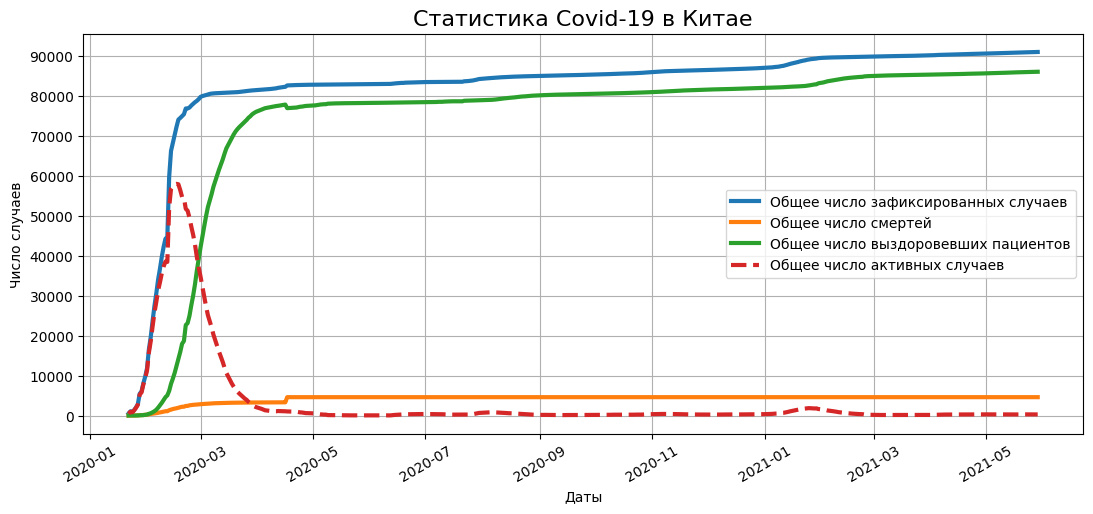

In [99]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

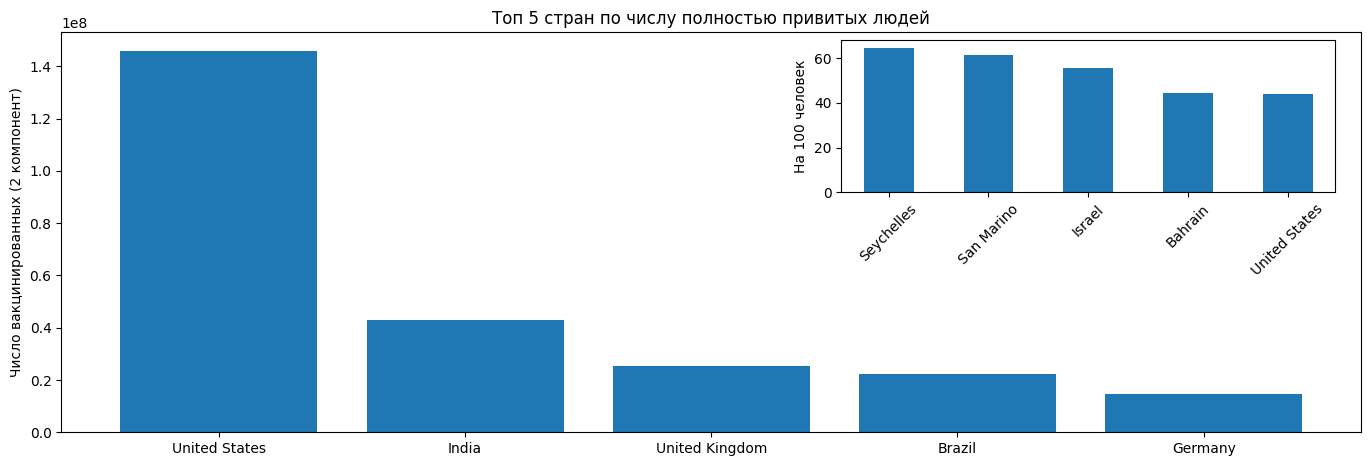

In [100]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

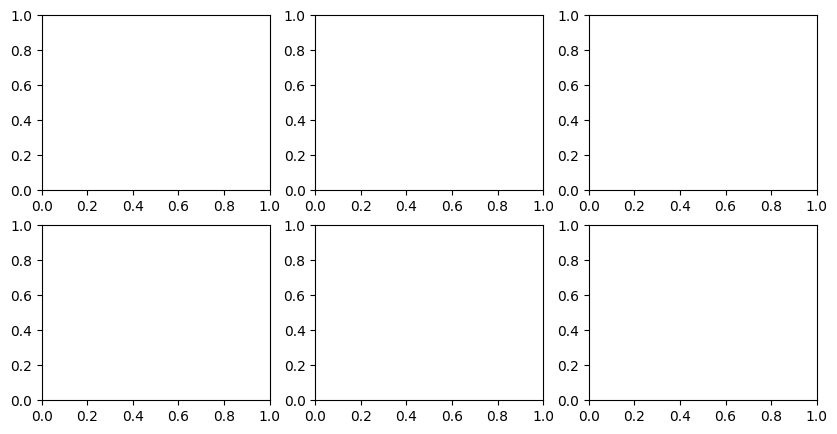

In [101]:
# subplots() - метод позволяющий расчерчивать холст несколькимикоординатрными сетками
#nrows — число строк;
#ncols — число столбцов;
#figsize — общий размер фигуры в дюймах (ширина и высота).

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

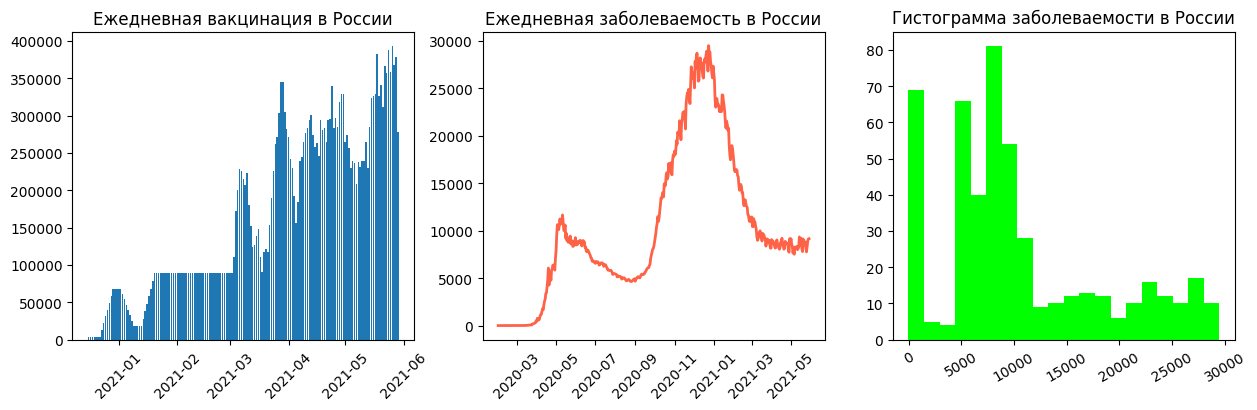

In [102]:
# гистограммы hist()
#x — массив чисел, для которого строится гистограмма;
#bins — число столбцов (корзин);
#orientation — ориентация гистограммы (по умолчанию 'vertical');
#color — цвет.

russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

### Seaborn

import seaborn as sns
print(sns.__version__)

In [103]:
import seaborn as sns
print(sns.__version__)

0.11.2


In [ ]:
#Для фильтрации по списку значений используем метод isin(), который проверяет, есть ли запись в столбце в переданном в метод списке. 
# В результате возвращается привычная нам маска.

In [104]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


In [ ]:
#Основные параметры метода histplot()
#data — DataFrame, по которому строится график;
#x — признак, который будет отложен по оси абсцисс;
#y — признак, который будет отложен по оси ординат;
#hue — группировочный категориальный признак, который позволяет строить отдельный график для каждой 
# категории (не стоит использовать его для гистограмм, но он широко используется для других видов графиков в Seaborn);
#ax — система координат Matplotlib, в которой строится график;
#color — цвет графика;
#bins — число столбцов в гистограмме (по умолчанию вычисляется автоматически с помощью специальных формул);
#kde — параметр, указывающий, стоит ли сглаживать гистограмму кривой (по умолчанию False).

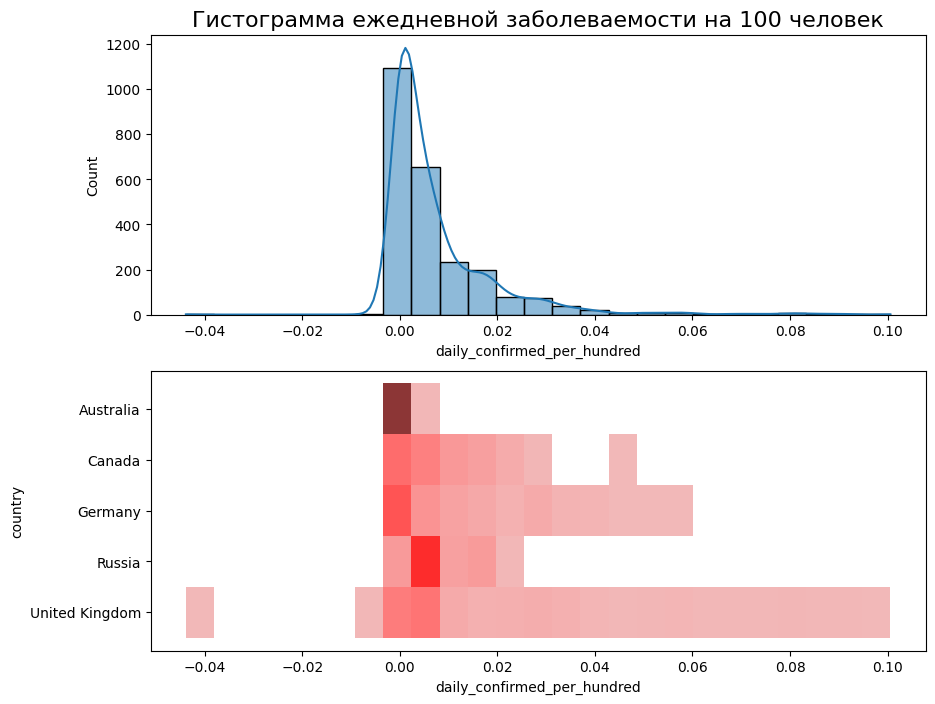

In [106]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

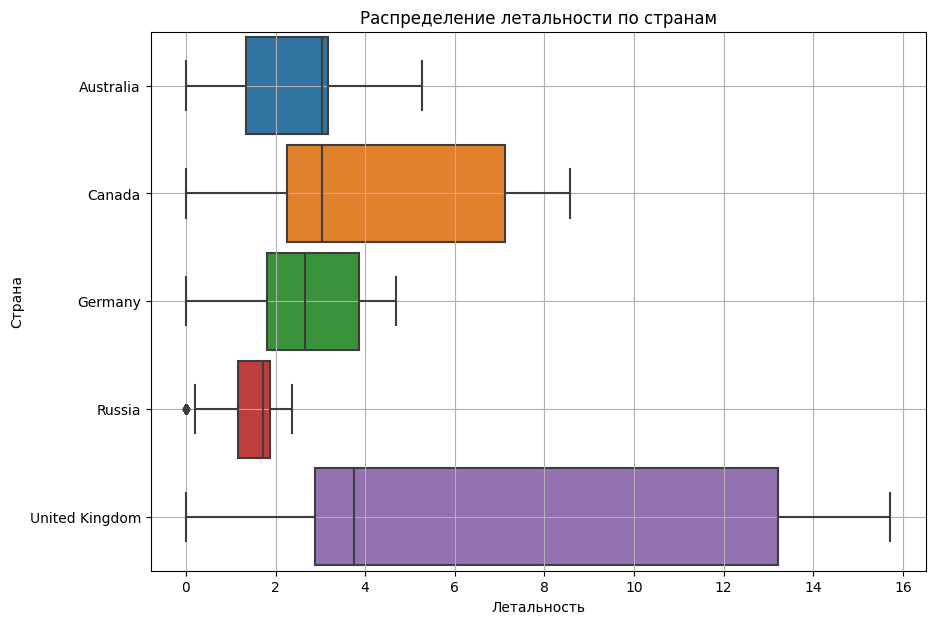

In [107]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

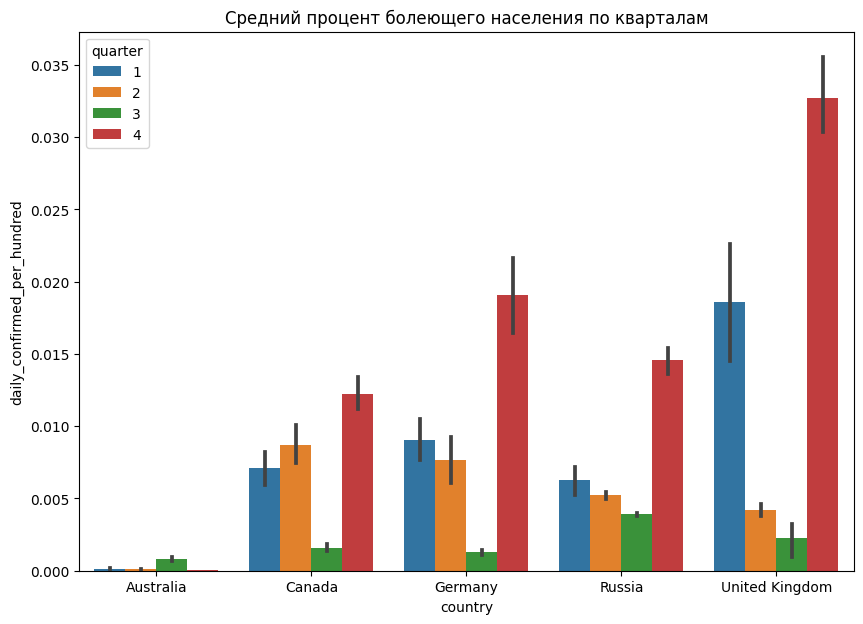

In [108]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

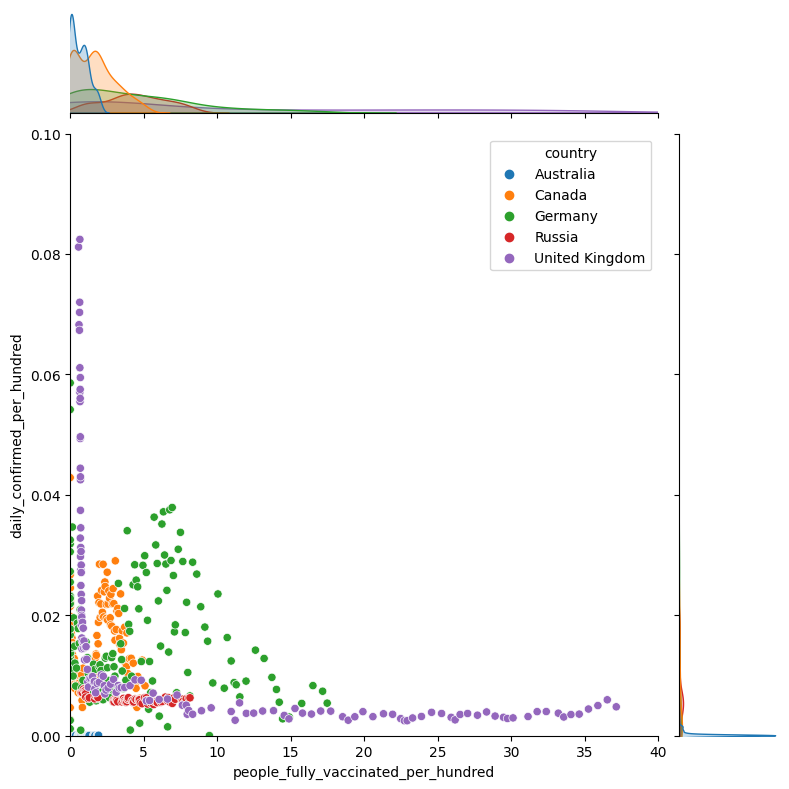

In [109]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

In [110]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.78,NaN,NaN,NaN,12.62,12.88,13.28,13.73,14.18,14.40
Canada,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.06,0.07,0.09,...,48.41,49.55,50.44,51.20,52.08,52.69,53.40,54.27,55.29,56.02
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.29,39.79,40.06,40.22,40.40,40.76,41.41,41.99,42.52,42.73
Russia,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


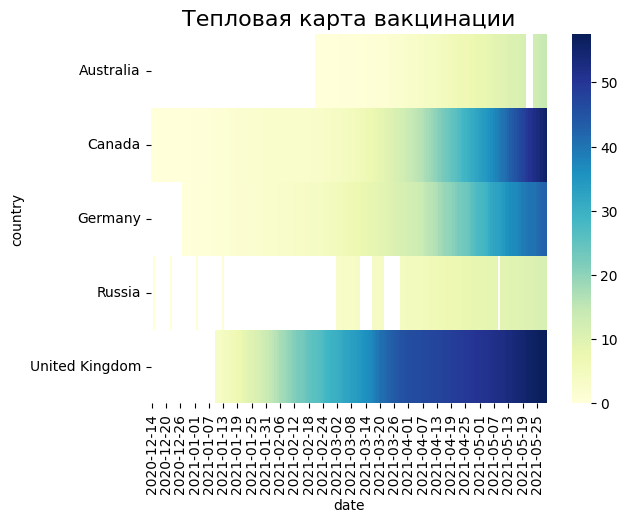

In [111]:
#Тепловая карта. heatmap(). annot - легенда, cmap - цветовая гамма
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

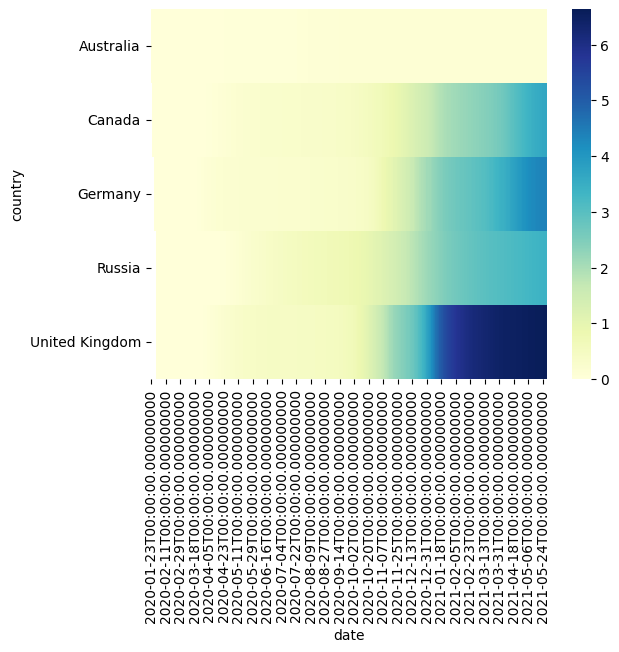

In [116]:
#6.4
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed']/croped_covid_df['population']*100
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country',
)
heatmap = sns.heatmap(
    data=pivot,
    cmap='YlGnBu',
    )


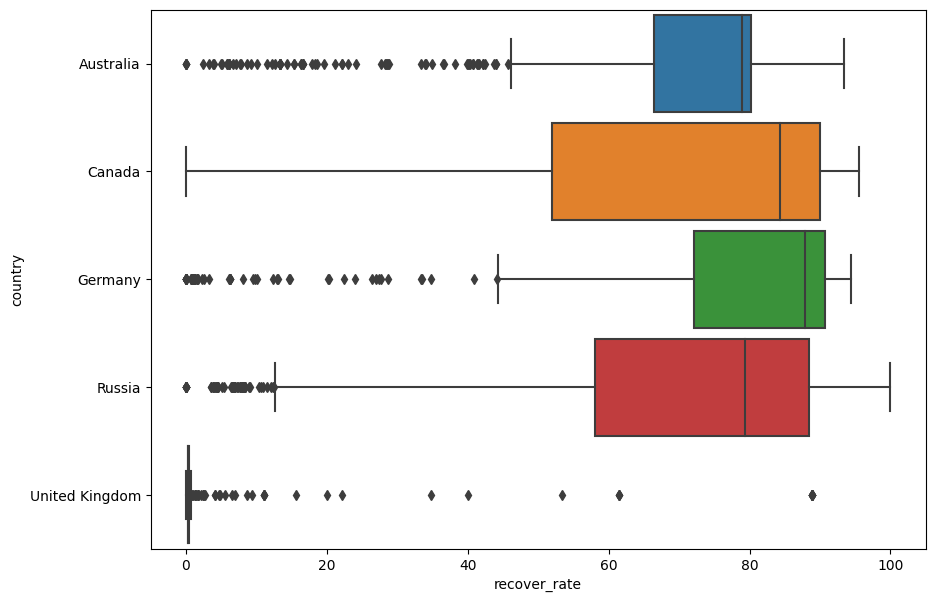

In [117]:
#6.5
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)

### PLOTLY

In [118]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.9.0


In [ ]:
#Plotly позволяет строить графики в нескольких режимах. Мы рассмотрим самый новый и подающий надежды — 
# экспресс-режим. Его функциональность скромнее, чем у полного режима Plotly, но нам её будет более чем
# достаточно. Для работы в экспресс-режиме предназначен модуль plotly.express. Он был выпущен в марте 
# 2019 года и находится в процессе активной разработки.

#→ Работа с plotly.express напоминает работу с библиотекой Seaborn. Отличие лишь в том, что все настройки графика
# (размеры, подписи осей, текста на графике) прописываются в самом методе.

#С помощью экспресс-режима (px) можно строить уже знакомые нам графики:

#line() — линейные графики;
#histogram() — гистограммы;
#scatter() — диаграммы рассеяния;
#box() — коробчатые диаграммы;
#bar() — столбчатые диаграммы;
#pie() — круговые диаграммы.

In [123]:
line_data = covid_df.groupby('date', as_index=False).sum()
fig = px.line(
    data_frame=line_data, #DataFrame
    x='date', #ось абсцисс
    y=['confirmed', 'recovered', 'deaths', 'active'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='Confirmed, Recovered, Deaths, Active cases over Time' #заголовок
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed